 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [95]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [96]:
# Reading whale returns
whale_returns_data = Path("whale_returns.csv")

whale_rt = pd.read_csv(whale_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_rt.sort_index(inplace= True)

In [97]:
# Count nulls
whale_rt.count()
whale_rt.isnull().mean()*100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [98]:
# Drop nulls
whale_rt = whale_rt.dropna().copy()


In [99]:
whale_rt.isnull().mean()*100

SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
dtype: float64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [100]:
# Reading algorithmic returns
algo_returns_data = Path("algo_returns.csv")
algo_rt = pd.read_csv(algo_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_rt.sort_index(inplace= True)

In [101]:
# Count nulls
algo_rt.count()
algo_rt.isnull().mean()*100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [102]:
# Drop nulls
algo_rt = algo_rt.dropna().copy()

In [103]:
algo_rt.isnull().mean()*100

Algo 1    0.0
Algo 2    0.0
dtype: float64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [104]:
# Reading S&P 500 Closing Prices
sp500_history_data = Path("sp500_history.csv")
sp500_hist = pd.read_csv(sp500_history_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_hist.sort_index(inplace= True)

In [105]:
# Check Data Types
sp500_hist['Close'].head()

Date
2012-10-01    $1444.49
2012-10-02    $1445.75
2012-10-03    $1450.99
2012-10-04    $1461.40
2012-10-05    $1460.93
Name: Close, dtype: object

In [106]:
# Fix Data Types
sp500_hist['Close'] = sp500_hist['Close'].str.replace('$', '')
sp500_hist['Close'] = sp500_hist['Close'].astype('float')
sp500_hist['Close']

/Users/garrett/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64

In [107]:
# Calculate Daily Returns
sp500_rt = sp500_hist.pct_change()
sp500_rt

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [108]:
# Drop nulls
sp500_rt.count()
sp500_rt.isnull().mean()*100

Close    0.060643
dtype: float64

In [109]:
sp500_rt = sp500_rt.dropna().copy()
sp500_rt.isnull().mean()*100

Close    0.0
dtype: float64

In [110]:
# Rename `Close` Column to be specific to this portfolio.
sp500_rt.rename(columns={'Close': 'sp500'}, inplace = True)
sp500_rt

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [111]:
whale_rt

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [112]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_rt = pd.concat([whale_rt, algo_rt, sp500_rt], axis="columns", join="inner")
combined_rt.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

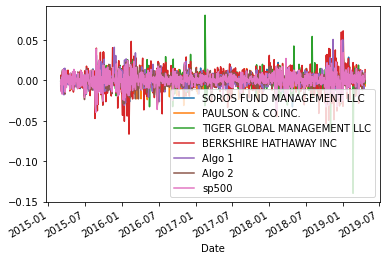

In [113]:
# Plot daily returns of all portfolios
combined_rt.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

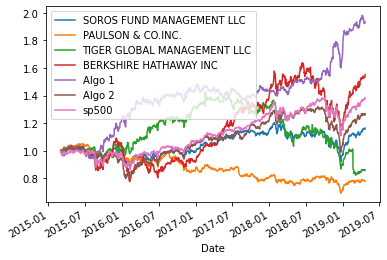

In [114]:
# Calculate cumulative returns of all portfolios
cumulative_rt= (1+combined_rt).cumprod()
cumulative_rt
# Plot cumulative returns
cumulative_rt.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

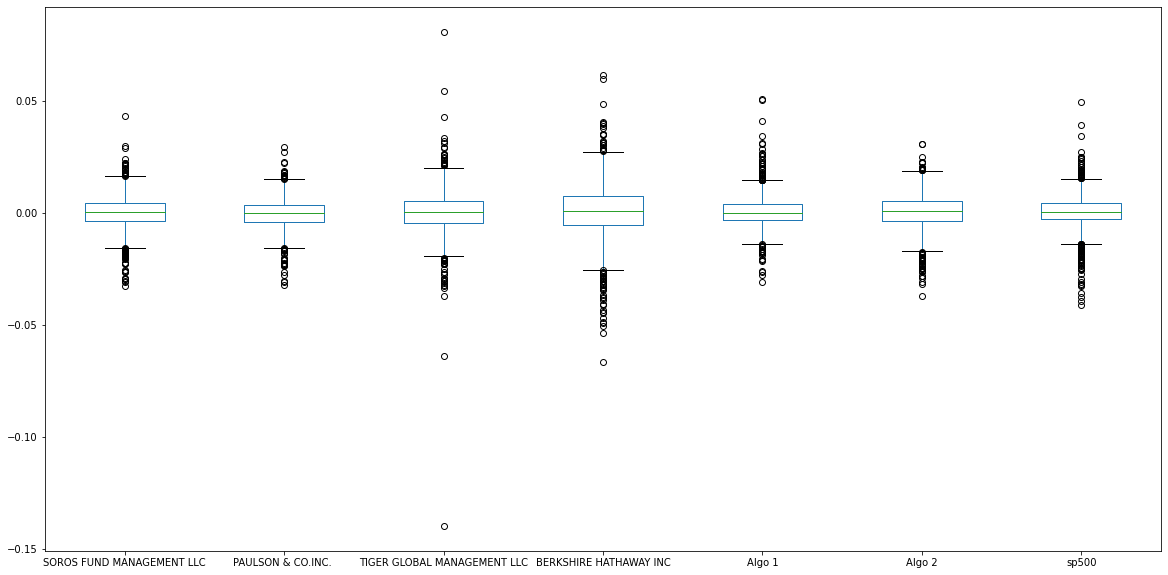

In [115]:
# Box plot to visually show risk
combined_rt.plot(kind= 'box', figsize= (20,10))

### Calculate Standard Deviations

In [116]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_rt.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [117]:
# Determine which portfolios are riskier than the S&P 500
combined_std = combined_std.sort_values(ascending=False)
combined_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
sp500                          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Calculate the Annualized Standard Deviation

In [118]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
sp500                          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

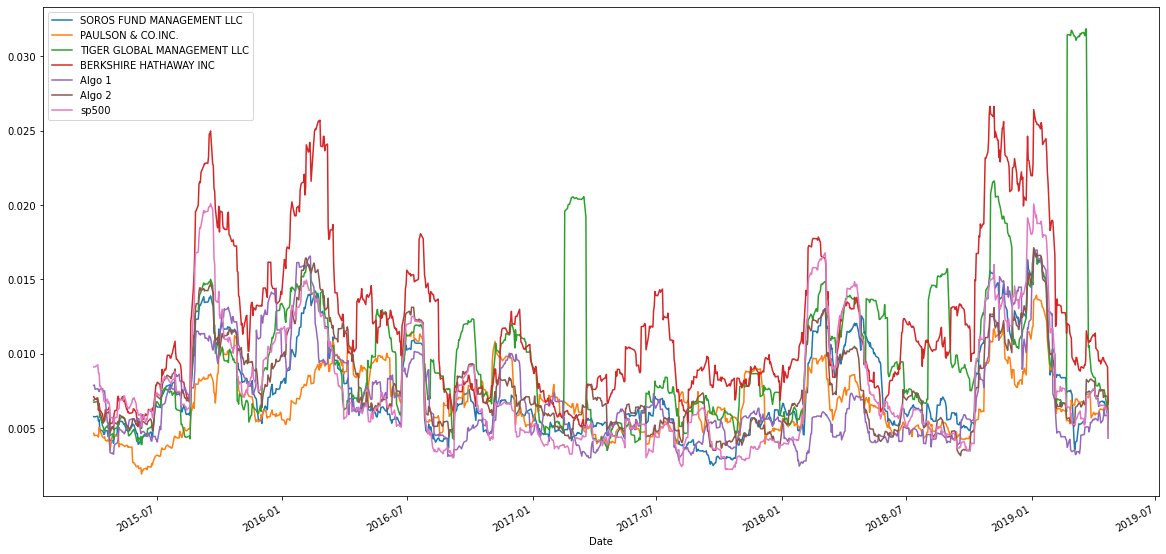

In [119]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
comb_rollstd = combined_rt.rolling(window=21).std()
# Plot the rolling standard deviation
comb_rollstd.plot(figsize=(20,10))

### Calculate and plot the correlation

In [120]:
# Calculate the correlation
correlation = combined_rt.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

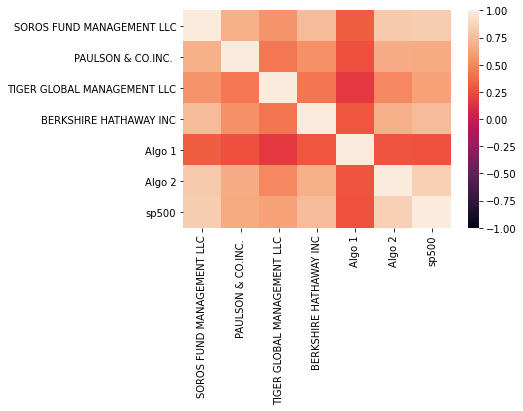

In [86]:
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

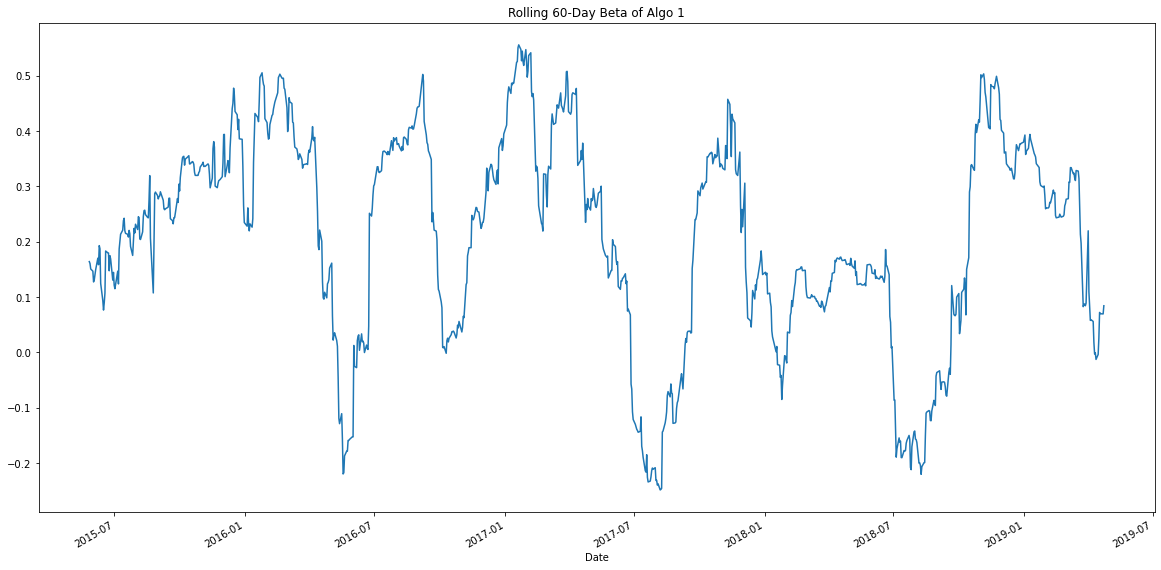

In [126]:
# Calculate covariance of a single portfolio
algo1_covariance = combined_rt['Algo 1'].cov(combined_rt['sp500'])
algo1_rolling_covariance = combined_rt['Algo 1'].rolling(window=60).cov(combined_rt['sp500'])
# Calculate variance of S&P 500
variance = combined_rt['sp500'].var()
rolling_variance = combined_rt['sp500'].rolling(window=60).var()
# Computing beta
algo1_beta= algo1_covariance / variance
algo1_rolling_beta= algo1_rolling_covariance / rolling_variance
# Plot beta trend
algo1_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

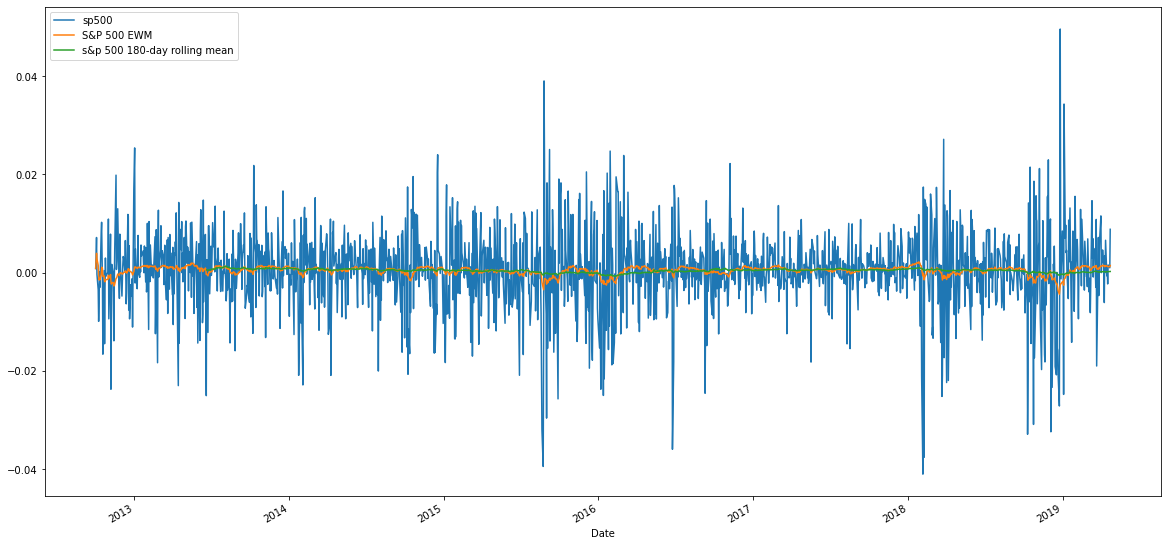

In [143]:
# Use `ewm` to calculate the rolling window
ewm = sp500_rt.ewm(span=21, adjust=False).mean()

ax = sp500_rt.plot(figsize=(20,10))

times = ['2012-10-02','2019-04-23']
sp500_rt.ewm(halflife=21).mean().plot(ax=ax)
# Plot 180-Day Rolling Mean on the same figure
sp500_rt.rolling(window=180).mean().plot(ax=ax)

# Set the legend of the figure
ax.legend(["sp500", "S&P 500 EWM", "s&p 500 180-day rolling mean"]);

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [145]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_rt.mean() * 252) / (combined_rt.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

<AxesSubplot:>

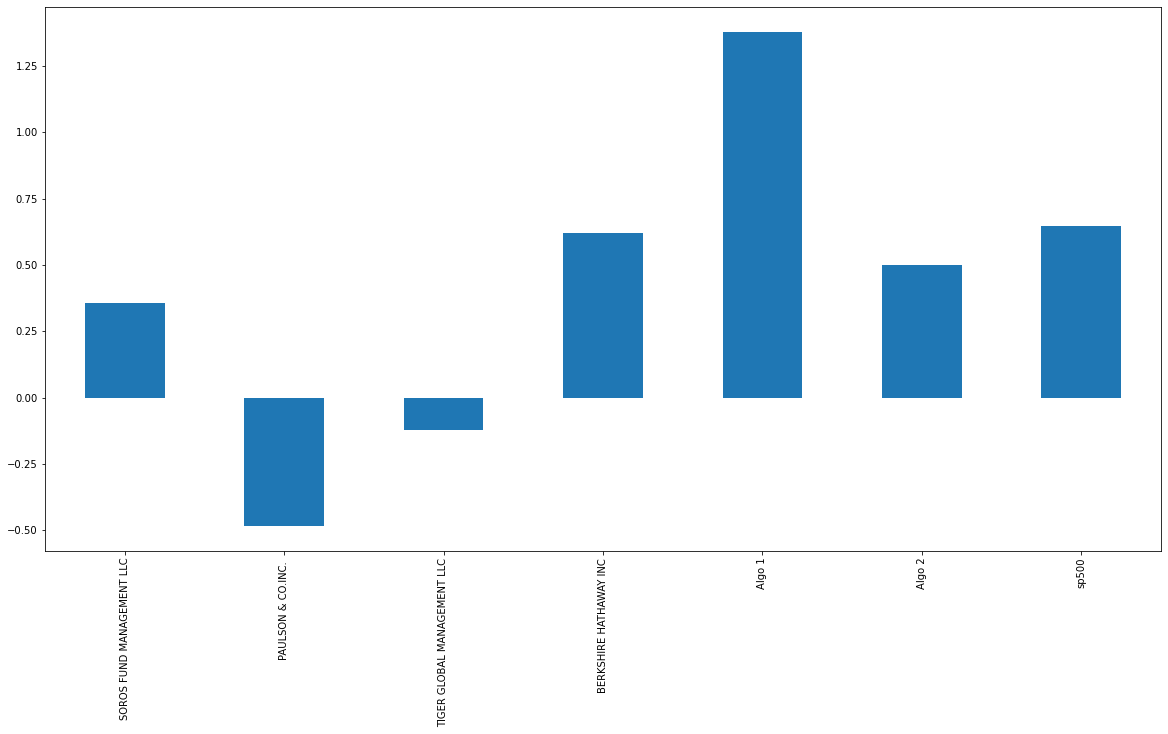

In [148]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', figsize=(20,10))

In [149]:
### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

"Only Algo 1 outperforms everything"

'Only Algo 1 outperforms everything'

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [177]:
# Reading data from 1st stock
appl_hist_data = Path("aapl_historical.csv")

aapl_df = pd.read_csv(appl_hist_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.sort_index(inplace= True)


In [178]:
aapl_df = aapl_df.drop('Symbol', 1)

In [179]:
aapl_df.rename(columns={'NOCP': 'aapl'}, inplace = True)

In [180]:
# Reading data from 2nd stock
cost_hist_data = Path("cost_historical.csv")

cost_df = pd.read_csv(cost_hist_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.sort_index(inplace= True)

In [181]:
cost_df = cost_df.drop('Symbol', 1)
cost_df.rename(columns={'NOCP': 'cost'}, inplace = True)

In [182]:
# Reading data from 3rd stock
goog_hist_data = Path("goog_historical.csv")

goog_df = pd.read_csv(goog_hist_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.sort_index(inplace= True)

In [183]:
goog_df = goog_df.drop('Symbol', 1)
goog_df.rename(columns={'NOCP': 'goog'}, inplace = True)

In [184]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([aapl_df, cost_df, goog_df], axis="columns", join="inner")
combined_df.head()

,aapl,cost,goog
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [188]:
# Calculate daily returns
myport_rt = combined_df.pct_change()
myport_rt
# Drop NAs
myport_rt = myport_rt.dropna()
# Display sample data
myport_rt.head()

,aapl,cost,goog
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [192]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
myfolio_returns = myport_rt.dot(weights)

# Display sample data
myfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [202]:
# Join your returns DataFrame to the original returns DataFrame
myport_combined= pd.concat([myport_rt, myfolio_returns], axis="columns", join="inner")

myport_combined.rename(columns={0: 'weighted return'}, inplace = True)


In [203]:
myport_combined

,aapl,cost,goog,weighted return
Trade DATE,,,,
2018-05-14,-0.002333,0.000613,0.001766,0.000015
2018-05-15,-0.009088,-0.002042,-0.019060,-0.010064
2018-05-16,0.009333,0.016523,0.002354,0.009403
2018-05-17,-0.006324,0.004479,-0.002940,-0.001595
2018-05-18,-0.003637,-0.003206,-0.011339,-0.006061
...,...,...,...,...
2019-05-03,0.012431,0.007953,0.019602,0.013329
2019-05-06,-0.015443,-0.001594,0.003366,-0.004557
2019-05-07,-0.026957,-0.016583,-0.012855,-0.018798


In [204]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
myport_combined.count()
myport_combined.isnull().mean()*100

aapl               0.0
cost               0.0
goog               0.0
weighted return    0.0
dtype: float64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [205]:
# Calculate the annualized `std`
port_std = myport_combined.std()
port_std = port_std.sort_values(ascending=False)
annu_port_std = port_std * np.sqrt(252)
annu_port_std

aapl               0.296955
goog               0.263554
weighted return    0.210262
cost               0.209320
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

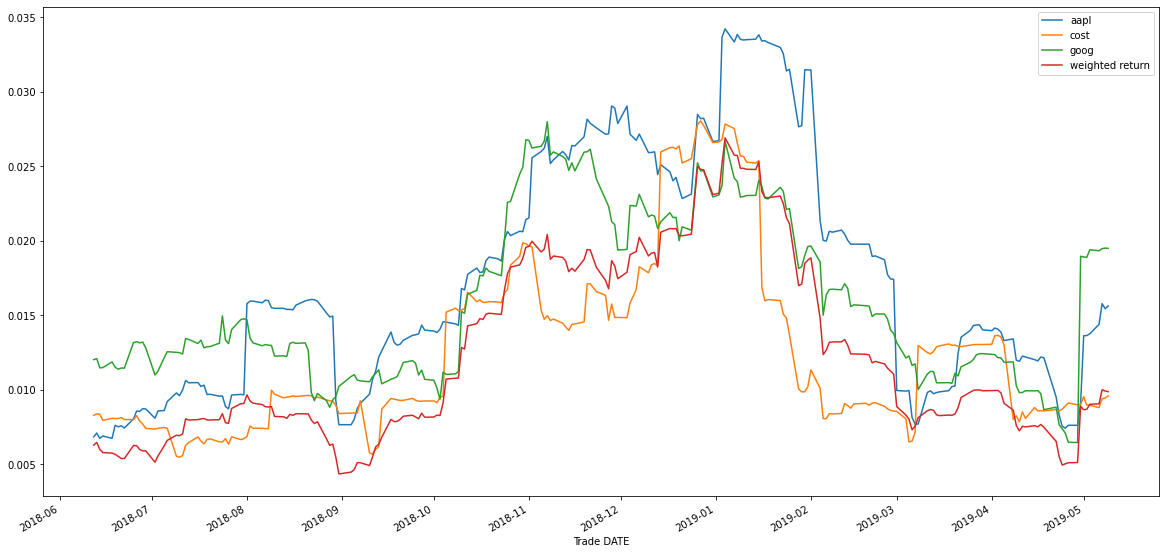

In [207]:
# Calculate rolling standard deviation
myport_rollstd = myport_combined.rolling(window=21).std()
# Plot rolling standard deviation
myport_rollstd.plot(figsize=(20,10))

### Calculate and plot the correlation

In [208]:
# Calculate and plot the correlation
myport_corr = myport_combined.corr()
myport_corr

,aapl,cost,goog,weighted return
aapl,1.000000,0.413546,0.655007,0.881676
cost,0.413546,1.000000,0.385145,0.687446
goog,0.655007,0.385145,1.000000,0.853984
weighted return,0.881676,0.687446,0.853984,1.000000


<AxesSubplot:>

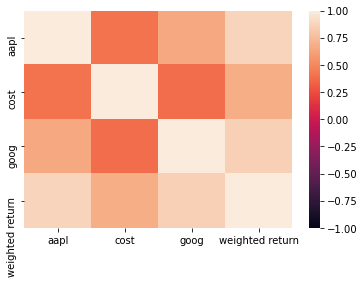

In [210]:
sns.heatmap(myport_corr, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [211]:
# Calculate and plot Beta
myport_rolling_cov = myport_combined['weighted return'].rolling(window=60).cov(combined_rt['sp500'])
myport_rolling_beta= myport_rolling_cov / rolling_variance

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}>

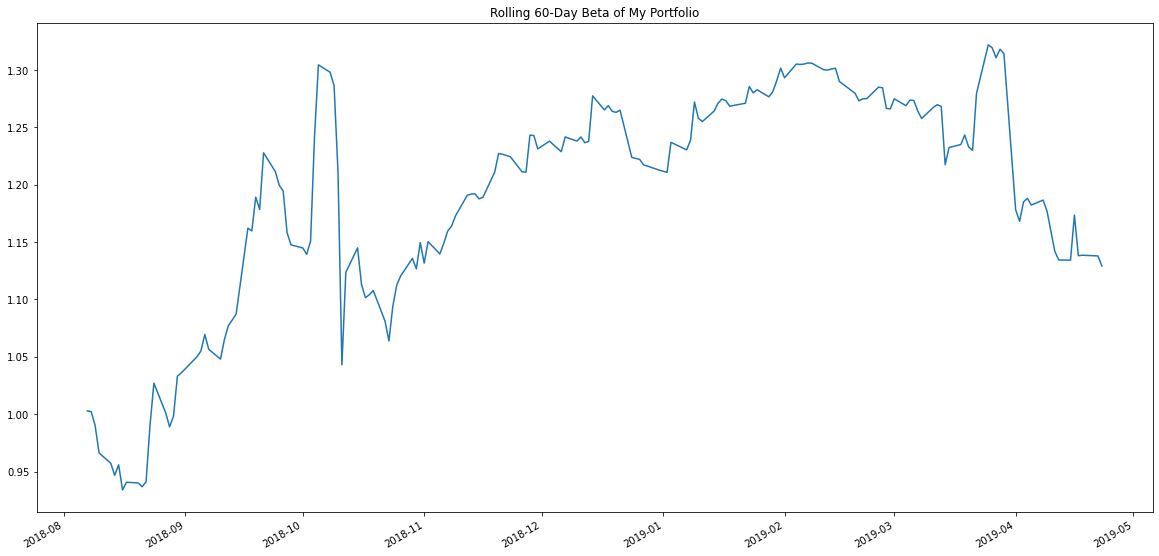

In [212]:
myport_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [213]:
# Calculate Annualzied Sharpe Ratios
myport_sharratios = (myport_combined.mean() * 252) / (myport_combined.std() * np.sqrt(252))
myport_sharratios

aapl               0.361306
cost               1.160482
goog               0.349657
weighted return    0.701280
dtype: float64

<AxesSubplot:>

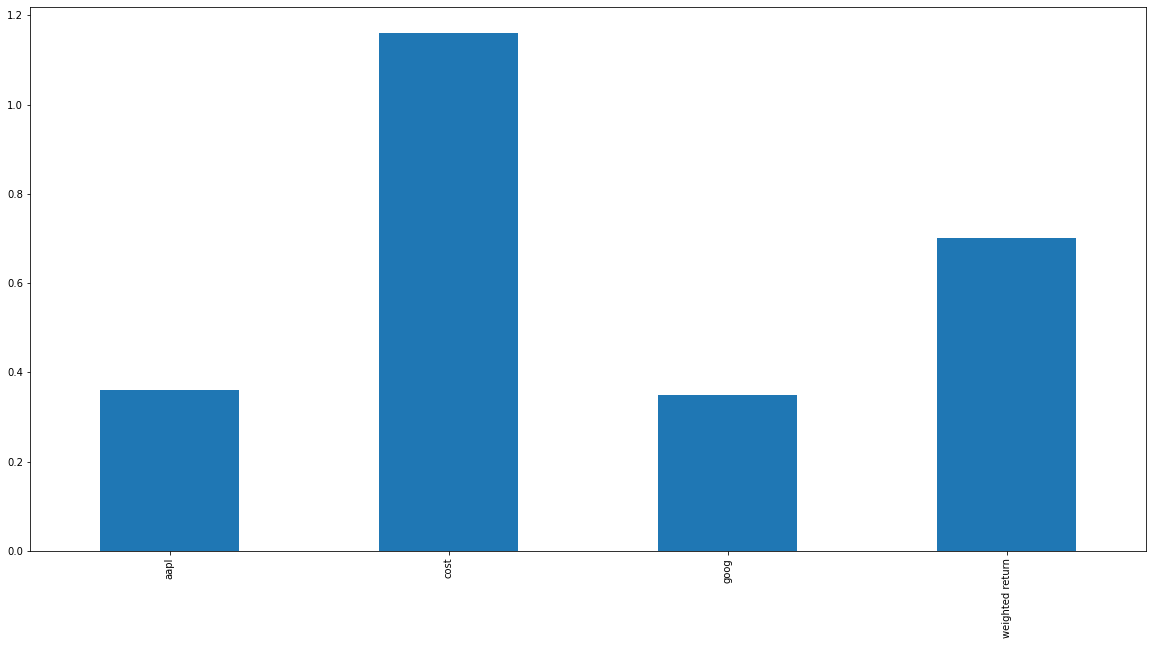

In [214]:
# Visualize the sharpe ratios as a bar plot
myport_sharratios.plot(kind='bar', figsize=(20,10))

### How does your portfolio do?

Write your answer here!

In [ ]:
#it does well compared to appl and goog but cost beats it out in returns.